In [81]:
from pathlib import Path

import numpy as np
import pandas as pd
from transformers import BertTokenizer
import torch.nn.functional as F
import torch
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, wilcoxon

In [8]:
MODELS = ['bert-base-uncased']
target_path = Path('runs') / 'crows_pairs/data/crows_pairs_anonymized.csv'

WilcoxonResult(statistic=437365.0, pvalue=7.450508167014153e-15)
11262.721755545512


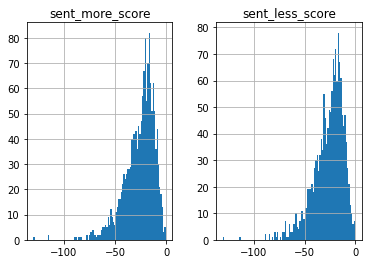

In [88]:
fig, ax = plt.subplots(len(MODELS), 2)

df_dict = {}
for n, model in enumerate(MODELS):
    df_dict[model] = pd.read_csv(target_path / model / 'results.csv')
    df = df_dict[model]
    result = wilcoxon(df['sent_more_score'], df['sent_less_score'], zero_method='wilcox', correction=True)
    print(result)
    r = result.statistic / np.sqrt(len(df) - len(df[df['sent_more_score'] == df['sent_less_score']]))
    print(r)
    df.hist('sent_more_score', ax=ax[0], bins=100)
    df.hist('sent_less_score', ax=ax[1], bins=100)